In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)

client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 128,Total memory: 0.98 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46335,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 128
Started: Just now,Total memory: 0.98 TiB
Comm: tcp://127.0.0.1:34631,Total threads: 8
Dashboard: http://127.0.0.1:38583/status,Memory: 62.93 GiB
Nanny: tcp://127.0.0.1:44685,


In [2]:
## Read in adjoint sensitivity diagnostics for a transect from 0-60m at 140W (1S to 1N) 
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import xarray as xr
from xmitgcm import open_mdsdataset
import numpy as np
import warnings
# warnings.filterwarnings("ignore")

data_dir = '/data/SO3/edavenport/tpose6/sep2012/sens_nino34/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 10 #
itPerFile = 72 # 1 day
intervals = range(0,itPerFile*num_diags,itPerFile) # adjoint sensitivity will start at 0 and go to 1 lag (1 interval less than total number of timesteps)

# when prefix is not set, this will read all available files 
# have to ignore unkown vars until we have an available_diagnostics.log that includes ADJrhoinsitu
# tpose_ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,ref_date='2012-09-01',delta_t=1200,ignore_unknown_vars=True)
prefix = 'ADJetan'
tpose_ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,prefix=prefix,iters=intervals,ignore_unknown_vars=True)
tpose_ds['XC'] = tpose_ds.XC.astype(float)
tpose_ds['YC'] = tpose_ds.YC.astype(float)
tpose_ds['Z'] = tpose_ds.Z.astype(float)
tpose_ds['XG'] = tpose_ds.XG.astype(float)
tpose_ds['YG'] = tpose_ds.YG.astype(float)



In [3]:
tpose_ds

<xarray.Dataset> Size: 410MB
Dimensions:  (time: 10, YC: 336, XC: 1128, XG: 1128, YG: 336, Z: 66, Zp1: 67,
              Zu: 66, Zl: 66)
Coordinates: (12/34)
    iter     (time) int64 80B dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 80B 00:00:00 00:01:12 ... 00:09:36 00:10:48
  * XC       (XC) float64 9kB 104.1 104.2 104.4 104.6 ... 291.6 291.8 291.9
  * YC       (YC) float64 3kB -25.92 -25.75 -25.58 -25.42 ... 29.58 29.75 29.92
  * XG       (XG) float64 9kB 104.0 104.2 104.3 104.5 ... 291.5 291.7 291.8
  * YG       (YG) float64 3kB -26.0 -25.83 -25.67 -25.5 ... 29.5 29.67 29.83
    ...       ...
    maskS    (Z, YG, XC) bool 25MB dask.array<chunksize=(66, 336, 1128), meta=np.ndarray>
    dxF      (YC, XC) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    rhoRef   (Z) >f4 264B dask.array<chunksize=(66,), meta=np.ndarray>
    dyF      (YC, XC) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dxV      (YG, XG) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
    dyU      (YG, XG) >f4 2MB dask.array<chunksize=(336, 1128), meta=np.ndarray>
Data variables:
    ADJetan  (time, YC, XC) float32 15MB dask.array<chunksize=(1, 336, 1128), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='/data/SO3/eda...

In [4]:
tpose_ds.ADJetan[-1].max().compute()

<xarray.DataArray 'ADJetan' ()> Size: 4B
array(1.1349366e-06, dtype=float32)
Coordinates:
    iter     int64 8B 648
    time     timedelta64[ns] 8B 00:10:48

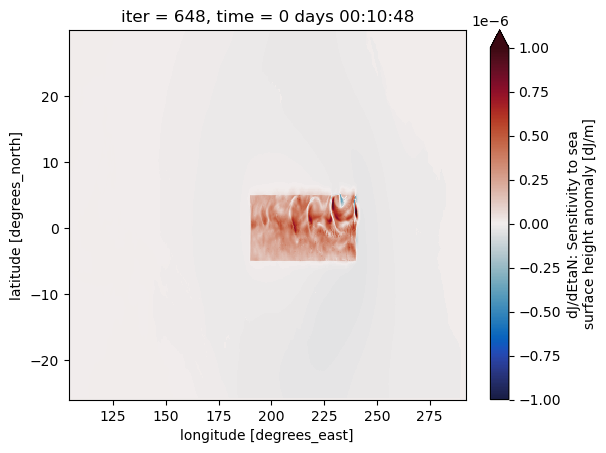

In [11]:
tpose_ds.ADJetan[-1].plot(x='XC', y='YC',cmap=cmo.balance, vmin=-1e-6, vmax=1e-6, robust=True)